In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.transform import resize
from keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score

In [180]:
# According to the documents, the values for efficientNetB0 should be 0~255
# the image shape should at least 32x32
# We need to change the image shape first
train=pd.read_csv('train.csv')
X=train.drop('label',axis=1).values.reshape(len(train),28,28,1)
y=train.label.values

In [181]:
X=tf.image.resize_with_pad(X,32,32)

In [182]:
X=X.numpy()

In [183]:
X.shape

(42000, 32, 32, 1)

In [184]:
# y label
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

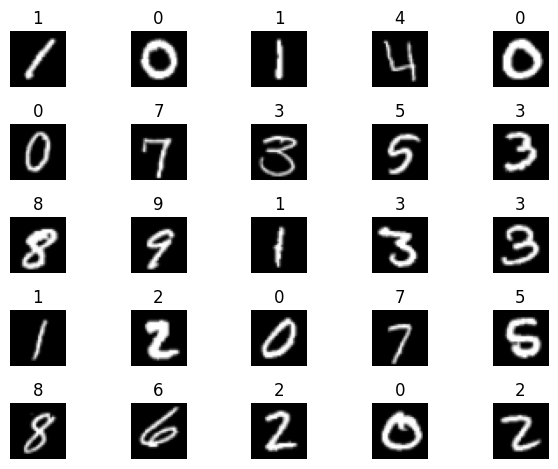

In [185]:
# select first 10 images for visualization
select=X[:25]
k=1
while k<=25:
    plt.subplot(5,5,k)
    plt.imshow(select[k-1],cmap='gray')
    plt.title(y[k-1])
    plt.axis('off')
    k+=1
plt.tight_layout()

In [187]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
X_train=X_train.repeat(3,-1)
X_train=tf.convert_to_tensor(X_train)
X_valid=X_valid.repeat(3,-1)
X_valid=tf.convert_to_tensor(X_valid)
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

In [221]:
# Feature extraction (freeze all the layers)
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,input_shape=(32,32,3))
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(32,32,3),name='input_layer')
x=base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
model_0=tf.keras.Model(inputs,outputs)

In [222]:
model_0.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),metrics=['accuracy'])

In [223]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 1, 1, 1280)        4049571   
_________________________________________________________________
global_average_pooling_2D (G (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [224]:
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [225]:
initial_epoch=10

In [226]:
# Feature Extraction
history=model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),epochs=initial_epoch,callbacks=[earlystop])

Epoch 1/10
919/919 [==============================] - 17s 15ms/step - loss: 0.7919 - accuracy: 0.7341 - val_loss: 0.5631 - val_accuracy: 0.8186
Epoch 2/10
919/919 [==============================] - 12s 13ms/step - loss: 0.5466 - accuracy: 0.8208 - val_loss: 0.3955 - val_accuracy: 0.8699
Epoch 3/10
919/919 [==============================] - 12s 13ms/step - loss: 0.4994 - accuracy: 0.8347 - val_loss: 0.3631 - val_accuracy: 0.8817
Epoch 4/10
919/919 [==============================] - 12s 13ms/step - loss: 0.4740 - accuracy: 0.8443 - val_loss: 0.4114 - val_accuracy: 0.8667
Epoch 5/10
919/919 [==============================] - 12s 13ms/step - loss: 0.4362 - accuracy: 0.8591 - val_loss: 0.3136 - val_accuracy: 0.8981
Epoch 6/10
919/919 [==============================] - 12s 13ms/step - loss: 0.4333 - accuracy: 0.8590 - val_loss: 0.3489 - val_accuracy: 0.8852
Epoch 7/10
919/919 [==============================] - 12s 13ms/step - loss: 0.4107 - accuracy: 0.8632 - val_loss: 0.3420 - val_accuracy:

<Axes: >

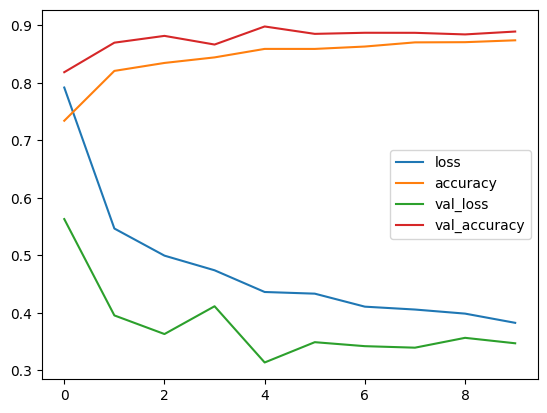

In [227]:
pd.DataFrame(history.history).plot()

In [228]:
# fine tuning
model_0.layers

In [229]:
model_0.layers[1].trainable = True
set_trainable = False

for layer in model_0.layers[1].layers:
    if layer.name == 'block6d_se_excite':
        set_trainable = True
    if set_trainable:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False
    else:
        layer.trainable = False
       

In [230]:
for layer_num, layer in enumerate(model_0.layers[1].layers):
    print(f'Layer {layer_num}: {layer.trainable}')

Layer 0: False
Layer 1: False
Layer 2: False
Layer 3: False
Layer 4: False
Layer 5: False
Layer 6: False
Layer 7: False
Layer 8: False
Layer 9: False
Layer 10: False
Layer 11: False
Layer 12: False
Layer 13: False
Layer 14: False
Layer 15: False
Layer 16: False
Layer 17: False
Layer 18: False
Layer 19: False
Layer 20: False
Layer 21: False
Layer 22: False
Layer 23: False
Layer 24: False
Layer 25: False
Layer 26: False
Layer 27: False
Layer 28: False
Layer 29: False
Layer 30: False
Layer 31: False
Layer 32: False
Layer 33: False
Layer 34: False
Layer 35: False
Layer 36: False
Layer 37: False
Layer 38: False
Layer 39: False
Layer 40: False
Layer 41: False
Layer 42: False
Layer 43: False
Layer 44: False
Layer 45: False
Layer 46: False
Layer 47: False
Layer 48: False
Layer 49: False
Layer 50: False
Layer 51: False
Layer 52: False
Layer 53: False
Layer 54: False
Layer 55: False
Layer 56: False
Layer 57: False
Layer 58: False
Layer 59: False
Layer 60: False
Layer 61: False
Layer 62: False
La

In [233]:
fine_tune_epoch=50
total_epochs=initial_epoch + fine_tune_epoch

In [234]:
model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),initial_epoch=history.epoch[-1],epochs=fine_tune_epoch,callbacks=[earlystop])

Epoch 10/50
919/919 [==============================] - 13s 14ms/step - loss: 0.3501 - accuracy: 0.8880 - val_loss: 0.2838 - val_accuracy: 0.9103
Epoch 11/50
919/919 [==============================] - 12s 13ms/step - loss: 0.3421 - accuracy: 0.8918 - val_loss: 0.3545 - val_accuracy: 0.8895
Epoch 12/50
919/919 [==============================] - 13s 14ms/step - loss: 0.3509 - accuracy: 0.8888 - val_loss: 0.2825 - val_accuracy: 0.9102
Epoch 13/50
919/919 [==============================] - 13s 14ms/step - loss: 0.3407 - accuracy: 0.8920 - val_loss: 0.2429 - val_accuracy: 0.9298
Epoch 14/50
919/919 [==============================] - 13s 14ms/step - loss: 0.3331 - accuracy: 0.8923 - val_loss: 0.2657 - val_accuracy: 0.9176
Epoch 15/50
919/919 [==============================] - 13s 14ms/step - loss: 0.3518 - accuracy: 0.8889 - val_loss: 0.4921 - val_accuracy: 0.8425
Epoch 16/50
919/919 [==============================] - 12s 14ms/step - loss: 0.3250 - accuracy: 0.8985 - val_loss: 0.2412 - val_ac

<Axes: >

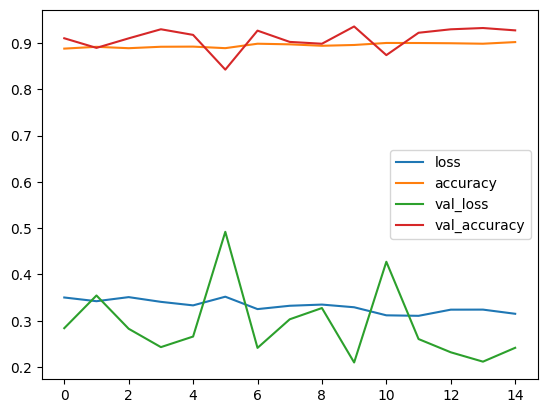

In [236]:
pd.DataFrame(model_0.history.history).plot()

In [237]:
y_pred=model_0.predict(X_valid)
y_pred=np.argmax(y_pred,axis=1)

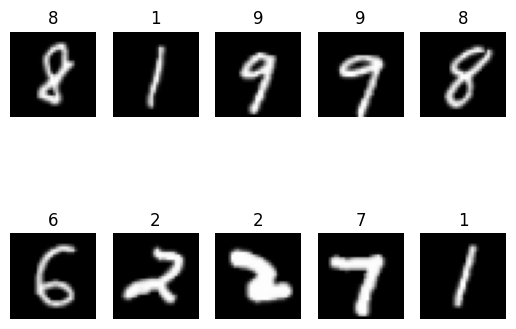

In [239]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_valid[i]/255.)
    plt.axis('off')
    plt.title(y_pred[i])

In [240]:
y_valid=np.argmax(y_valid,axis=1)

In [241]:
conf_mat=confusion_matrix(y_valid, y_pred)

In [242]:
conf_mat

array([[1185,    0,    9,    0,    0,    5,    0,    0,    1,    0],
       [   0, 1370,    4,    1,    3,    0,    2,    9,    0,    0],
       [   6,    6, 1216,   11,    3,   22,    0,    7,   20,    3],
       [   0,    0,   61, 1212,    0,   48,    0,    7,   22,    5],
       [   1,   13,   23,    0, 1012,    2,    3,  102,   14,   52],
       [   2,    0,   30,   31,    0, 1006,    1,    8,    6,    1],
       [  48,    5,   15,    0,    1,   21, 1142,    1,   19,    4],
       [   0,    4,   12,    1,    8,    4,    1, 1305,    1,   23],
       [   2,    1,   42,    9,    0,   27,    3,    5, 1101,   19],
       [  11,    3,   34,    7,    1,    4,    1,   14,   20, 1136]],
      dtype=int64)

In [244]:
accuracy_score(y_valid,y_pred)

0.9273809523809524